In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# First section takes care of preparing the data to feed the model
# It is the same for all models

# Fixing format of the data
def enc_label(label):
    code = 0
    if label == "right-turn":
        code = 1
    if label == "side":
        code = 2
    if label == "cuban-basic":
        code = 3
    if label == "suzie-q":
        code = 4
    return code

# Define hyperparameters
BATCH_SIZE = 64
EPOCHS = 10

MAX_SEQ_LENGTH = 30   # number of frames per figure
NUM_FEATURES = 50     # number of join coordinates
no_sample = 20        # number of examples

# Import the data
PATH_DATA = "Data_concat.csv"
data = pd.read_csv(PATH_DATA)

# Exploratory analysis number of classes

# Data preprocessing, get the input X and the label y
ind_start = data[data['status'] == "S"].index.tolist()
ind_end = data[data['status'] == "E"].index.tolist()

# Take intervals between consecutive "S", they define one figure
X = []
y = []

for i in range(no_sample):
    X.append(data.iloc[ind_start[i]: ind_end[i], 3:-27])  # the last 25 (visibility ) + 2
    y.append(data.loc[ind_start[i], 'label'])

# select frames from the interval TODO should be uniform
ind_samp = []

for i in range(no_sample):
    # Uniform
    aux = np.linspace(ind_start[i]
                      , ind_end[i]
                      , MAX_SEQ_LENGTH
                      , endpoint=False).astype(int)

    # random
    # aux = np.random.randint(ind_start[i], ind_end[i], MAX_SEQ_LENGTH)
    # aux.sort()
    ind_samp.append(aux)

# TODO: decide between random and uniform sampling

# Changing format of the data to be compatible with Tensor Flow
X_train = [x.loc[ind_samp[ind], :].to_numpy() for (ind, x) in enumerate(X)]
X_train = np.array(X_train)
X_train = X_train.reshape(no_sample, MAX_SEQ_LENGTH, NUM_FEATURES).astype("float32")
# TODO: decide of the X values need to be normalized
y_train = [enc_label(x) for x in y]
y_train = np.array(y_train).astype("float32")

/opt/anaconda3/envs/model/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (78,79) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
# Build the model
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(MAX_SEQ_LENGTH, NUM_FEATURES)))
model.add(layers.LSTM(64))
model.add(layers.Dense(5, activation="softmax"))
model.summary()

# Compile the model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 dense_1 (Dense)             (None, 5)                 325       
                                                                 
Total params: 29,765
Trainable params: 29,765
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Check the trainning accuracy
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    validation_data=(X_train, y_train)
)

Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 1.6730 - accuracy: 0.3000 - val_loss: 1.5436 - val_accuracy: 0.3000
Epoch 2/10
1/1 [==============================] - 0s 65ms/step - loss: 1.5436 - accuracy: 0.3000 - val_loss: 1.5625 - val_accuracy: 0.4000
Epoch 3/10
1/1 [==============================] - 0s 80ms/step - loss: 1.5625 - accuracy: 0.4000 - val_loss: 1.5580 - val_accuracy: 0.3000
Epoch 4/10
1/1 [==============================] - 0s 69ms/step - loss: 1.5580 - accuracy: 0.3000 - val_loss: 1.5642 - val_accuracy: 0.4500
Epoch 5/10
1/1 [==============================] - 0s 71ms/step - loss: 1.5642 - accuracy: 0.4500 - val_loss: 1.4957 - val_accuracy: 0.5500
Epoch 6/10
1/1 [==============================] - 0s 65ms/step - loss: 1.4957 - accuracy: 0.5500 - val_loss: 1.5079 - val_accuracy: 0.4000
Epoch 7/10
1/1 [==============================] - 0s 77ms/step - loss: 1.5079 - accuracy: 0.4000 - val_loss: 1.4841 - val_accuracy: 0.3500
Epoch 8/10
1/1 [=============

In [6]:
def render_history(history):
    plt.plot(history["loss"], label="loss")
    #plt.plot(history["val_loss"], label="val_loss")
    plt.legend()
    plt.title("Train losses")
    plt.show()
    plt.close()

    plt.plot(history["accuracy"], label="accuracy")
    #plt.plot(history["val_accuracy"], label="val_accuracy")
    plt.legend()
    plt.title("Train accuracies")
    plt.show()
    plt.close()

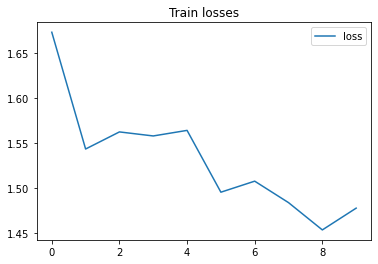

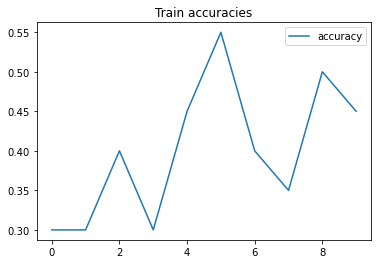

In [7]:
render_history(history.history)